In [556]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [557]:
img = cv2.imread('C:/Yuliya/Python/Projects/JapanActorClassifier/model/test_images/mishima.jpg')
img.shape

(1200, 863, 3)

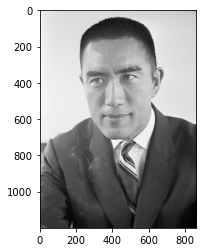

In [558]:
plt.imshow(img)

In [559]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1200, 863)

In [560]:
gray

array([[240, 238, 237, ..., 116, 124, 124],
       [239, 238, 237, ..., 116, 121, 128],
       [240, 239, 239, ..., 130, 126, 132],
       ...,
       [ 91,  90,  93, ...,   1,   1,   3],
       [ 95,  97,  89, ...,   0,   1,   4],
       [ 93, 104,  96, ...,   0,   3,   7]], dtype=uint8)

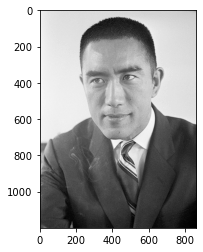

In [561]:
plt.imshow(gray, cmap='gray')

In [562]:
face_cascade = cv2.CascadeClassifier('C:/Yuliya/Python/Projects/JapanActorClassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Yuliya/Python/Projects/JapanActorClassifier/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[132, 167, 543, 543]])

In [563]:
(x,y,w,h) = faces[0]
x,y,w,h

(132, 167, 543, 543)

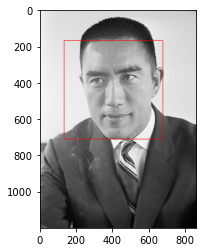

In [564]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

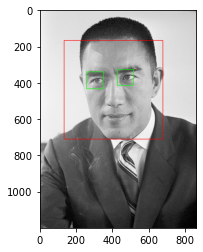

In [565]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

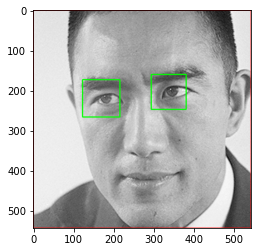

In [566]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [567]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

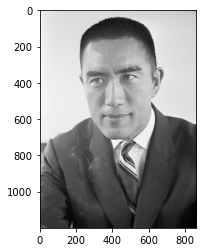

In [568]:
original_image = cv2.imread('C:/Yuliya/Python/Projects/JapanActorClassifier/model/test_images/mishima.jpg')
plt.imshow(original_image)

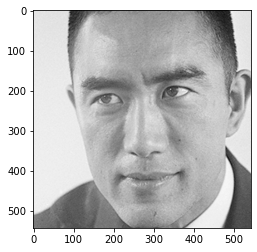

In [569]:
cropped_image = get_cropped_image_if_2_eyes('C:/Yuliya/Python/Projects/JapanActorClassifier/model/test_images/mishima.jpg')
plt.imshow(cropped_image)

In [570]:
path_to_data = "C:/Yuliya/Python/Projects/JapanActorClassifier/model/dataset/"
path_to_cr_data = "C:/Yuliya/Python/Projects/JapanActorClassifier/model/cropped/"

In [571]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [572]:
img_dirs

['C:/Yuliya/Python/Projects/JapanActorClassifier/model/dataset/abe_hiroshi',
 'C:/Yuliya/Python/Projects/JapanActorClassifier/model/dataset/hikari_mitsushima',
 'C:/Yuliya/Python/Projects/JapanActorClassifier/model/dataset/keita_machida',
 'C:/Yuliya/Python/Projects/JapanActorClassifier/model/dataset/miura_haruma',
 'C:/Yuliya/Python/Projects/JapanActorClassifier/model/dataset/sato_takeru']

In [574]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [575]:
cropped_image_dirs = []
actor_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    actor_name = img_dir.split('/')[-1]
    print(actor_name)
    
    actor_file_names_dict[actor_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None and roi_color.size != 0:
            cropped_folder = path_to_cr_data + actor_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = actor_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            actor_file_names_dict[actor_name].append(cropped_file_path)
            count += 1  

abe_hiroshi
Generating cropped images in folder:  C:/Yuliya/Python/Projects/JapanActorClassifier/model/cropped/abe_hiroshi
hikari_mitsushima
Generating cropped images in folder:  C:/Yuliya/Python/Projects/JapanActorClassifier/model/cropped/hikari_mitsushima
keita_machida
Generating cropped images in folder:  C:/Yuliya/Python/Projects/JapanActorClassifier/model/cropped/keita_machida
miura_haruma
Generating cropped images in folder:  C:/Yuliya/Python/Projects/JapanActorClassifier/model/cropped/miura_haruma
sato_takeru
Generating cropped images in folder:  C:/Yuliya/Python/Projects/JapanActorClassifier/model/cropped/sato_takeru


# Wavelet Transforms in Python

In [631]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [632]:
class_dict = {}
count = 0
for actor_name in actor_file_names_dict.keys():
    class_dict[actor_name] = count
    count = count + 1
class_dict

{'abe_hiroshi': 0,
 'hikari_mitsushima': 1,
 'keita_machida': 2,
 'miura_haruma': 3,
 'sato_takeru': 4}

In [633]:
X, y = [], []

for actor_name, training_files in actor_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))  # resize all our images to the same size
        img_har = w2d(img, "db1", 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        # stack images above vertically 
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[actor_name])

In [634]:
len(X[0])

4096

In [635]:
# Numbers that represent the color or the shape
X[0]  

array([[189],
       [197],
       [187],
       ...,
       [ 86],
       [  8],
       [  4]], dtype=uint8)

In [636]:
# Every our images are represented as an array 
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(224, 4096)

In [637]:
# Just to avoid a lot of warnings we converted INT to the FLOAT
X[0] 

array([189., 197., 187., ...,  86.,   8.,   4.])

## Data cleaning is done. To train the model

In [508]:
# Support vector machine is good when it comes to Classification

use SVM with rbf kernel tuned with heuristic finetuning

In [638]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [656]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# C - regularization
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 12))]) 
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7777777777777778

In [657]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.89      0.73      0.80        11
           2       1.00      0.50      0.67         6
           3       0.71      0.71      0.71         7
           4       0.55      0.75      0.63         8

    accuracy                           0.78        45
   macro avg       0.80      0.74      0.75        45
weighted avg       0.81      0.78      0.78        45



## GridSearch to try out different models with different paramets. 

In [658]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [659]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [660]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.653333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.508571,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.697937,{'logisticregression__C': 1}


*best_score 61% we got was on validation set:

In [661]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

*code below is testing on test set 

In [662]:
best_estimators['svm'].score(X_test,y_test)

0.7777777777777778

In [663]:
best_estimators['random_forest'].score(X_test,y_test)

0.4

In [664]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7333333333333333

In [668]:
best_clf = best_estimators['svm']

In [669]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[13,  0,  0,  0,  0],
       [ 0,  8,  0,  1,  2],
       [ 0,  0,  3,  1,  2],
       [ 1,  0,  0,  5,  1],
       [ 1,  1,  0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

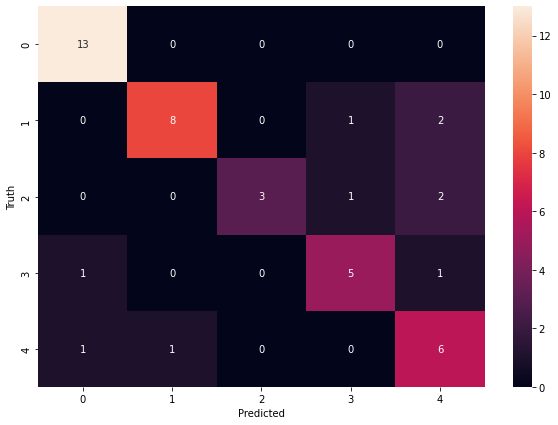

In [670]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [671]:
class_dict

{'abe_hiroshi': 0,
 'hikari_mitsushima': 1,
 'keita_machida': 2,
 'miura_haruma': 3,
 'sato_takeru': 4}

## Save the trained model

In [675]:
import joblib
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [676]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))